In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sounddevice as sd
import threading
import time
from genetic_algo import *
from char_animation import *


## Var definitions

In [3]:
shoulder = np.array([0, 1.9])
upper_arm_length = 0.4
forearm_length = 0.4
sequence_length = 50

beat_interval = 15
frame_duration_ms = 100  # ms per frame
beat_period_sec = (beat_interval * frame_duration_ms) / 1000
metronome_beats = [i % beat_interval == 0 for i in range(sequence_length)]
last_tick_time = [0]  # mutable reference

## Attempt with Genetic Algorithm

In [4]:
# --- Metronome Playback Thread ---
def metronome_thread(bpm):
    interval = 60 / bpm
    duration = 0.1
    frequency = 880  # Hz
    sample_rate = 44100

    t = np.linspace(0, duration, int(sample_rate * duration), False)
    tick = 0.5 * np.sin(2 * np.pi * frequency * t)

    while True:
        try:
            sd.play(tick, samplerate=sample_rate)
            sd.wait()
        except Exception as e:
            print(f"[Metronome Playback Error] {e}")
            break  # Optional: exit the loop on error
        time.sleep(interval - duration)


In [ ]:
bpm = 120
threading.Thread(target=metronome_thread, args=(bpm,), daemon=True).start()

# Run genetic algorithm to get best wave
best_seq = evolve(generations=60, pop_size=30)
print(best_seq)
# Show animation
ani = animate_sequence(best_seq)


ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


TypeError: initialize_population() missing 1 required positional argument: 'sequence_length'

ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8568:(snd_pcm_recover) underrun occurred


: 

## Genre Detection
If training dataset is not loaded, uncomment the following

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download(
#     "andradaolteanu/gtzan-dataset-music-genre-classification"
# )

# print("Path to dataset files:", path)

In [1]:
# Usual Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

general_path = './Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['country', 'hiphop', 'rock', 'metal', 'pop', 'disco', 'jazz', 'classical', 'blues', 'reggae']


y: [-0.17077637 -0.27716064 -0.26010132 ...  0.06536865  0.07171631
  0.06881714] 

y: [-0.17077637 -0.27716064 -0.26010132 ...  0.06536865  0.07171631
  0.06881714] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


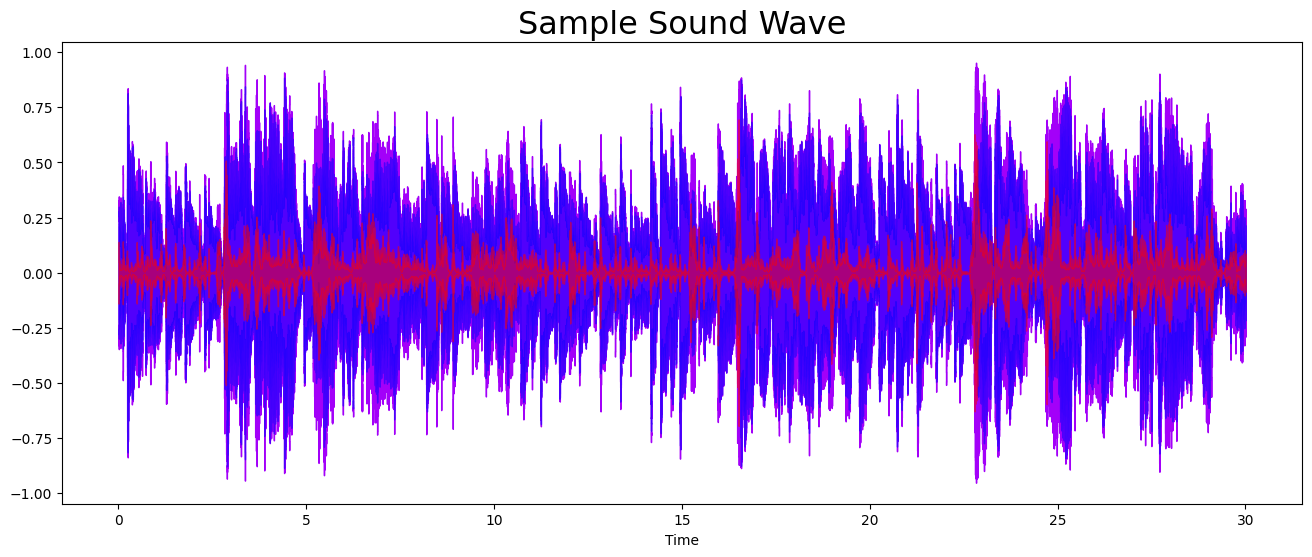

In [ ]:
# https://librosa.org/doc/main/generated/librosa.display.waveshow.html

# Input wav file
y, sr = librosa.load(f'{general_path}/genres_original/blues/blues.00036.wav')
audio_file, _ = librosa.effects.trim(y)

# Show the audio file
print('y:', y, '\n')
print('y:', audio_file, '\n')
print('y shape:', np.shape(audio_file), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', len(audio_file)/sr)

# Plot the audio file
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9")
plt.title("Sample Sound Wave", fontsize = 23)
y_harm, y_perc = librosa.effects.hpss(audio_file)
librosa.display.waveshow(y_harm, sr=sr, color = "b",alpha=0.5,  label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, label='Percussive')
plt.show()

In [13]:
tempo, beat_frames = librosa.beat.beat_track(y=audio_file, sr=sr)
print('Tempo:', tempo, '\n')
print('Beat Frames:', beat_frames, '\n')

Tempo: [151.99908088] 

Beat Frames: [   6   22   38   56   76   92  107  123  140  156  174  191  208  224
  243  262  280  297  314  332  349  366  384  402  419  436  452  468
  485  501  518  536  553  571  589  606  623  639  656  672  689  708
  725  741  758  774  790  809  827  846  865  883  899  916  933  950
  966  982 1000 1016 1032 1048 1064 1081 1098 1115 1132 1149 1165 1184
 1202 1220 1237 1253 1270 1288] 

